In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

### Data Preparation

In [10]:
# select the relevant columns to use
relevant_cols = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'] 

In [11]:
df = df[relevant_cols]

In [12]:
df.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [14]:
# No columns have any missing value
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Querstion 1
What is the most frequent observation for the column 'education'?

--> Secondary is the most frequent 'education' type with 23202 observations. The next is tertiary.

In [16]:
for col in df.columns:
    print(col)
    display(df[col].value_counts())
    print()

age


age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
95       2
93       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64


job


job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


marital


marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


education


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


balance


balance
0        3514
1         195
2         156
4         139
3         134
         ... 
3504        1
6980        1
1719        1
14352       1
13774       1
Name: count, Length: 7168, dtype: int64


housing


housing
yes    25130
no     20081
Name: count, dtype: int64


contact


contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


day


day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64


month


month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


duration


duration
124     188
90      184
89      177
122     175
114     175
       ... 
1594      1
1372      1
1174      1
1463      1
1095      1
Name: count, Length: 1573, dtype: int64


campaign


campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
38        3
43        3
41        2
50        2
37        2
55        1
51        1
63        1
46        1
58        1
39        1
44        1
Name: count, dtype: int64


pdays


pdays
-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 756        1
 745        1
 530        1
 749        1
 838        1
Name: count, Length: 559, dtype: int64


previous


previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
18         6
22         6
24         5
27         5
29         4
21         4
25         4
30         3
26         2
37         2
28         2
38         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64


poutcome


poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


y


y
no     39922
yes     5289
Name: count, dtype: int64

In [17]:
df['education'].mode()

0    secondary
Name: education, dtype: object

### Question 2
Create the correlation matrix for the numerical features of the dataset. In a correlation matrix, comput the correlation coefficient between every pair of features. 

What are the two features that have the biggest  correlation? 

Answer: pdays and previous are highest correlated features.

In [24]:
numerical_cols = list(df.dtypes[df.dtypes == 'int64'].index)

In [25]:
corr_matrix = df[numerical_cols].corr()
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

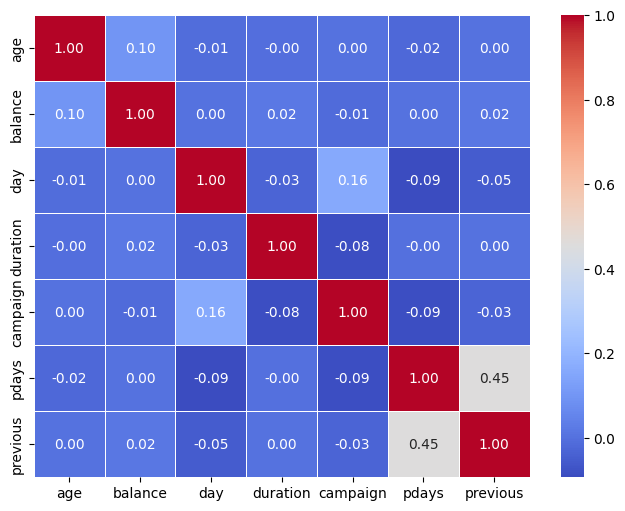

In [27]:
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()